In [ ]:
# 7.1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
n = 100
b0 = 1
b1 = 1
x = np.random.normal(0,1, n)
epsilon = np.random.normal(0,1,n)

In [ ]:
y = b0 + b1*x + epsilon

In [ ]:
x = np.append((x), [4])

In [ ]:
y = np.append((y), [-3])

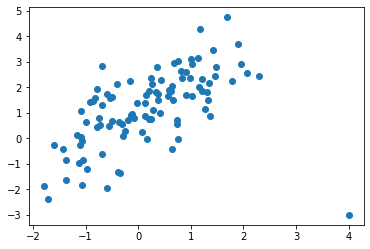

In [ ]:
plt.scatter(x, y)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression(penalty = 'l2', max_iter=1000).fit(X,y)

ValueError: ignored

In [ ]:
X = np.reshape(x, (-1,1))

In [ ]:
x.shape

(101,)

In [ ]:
X.shape

(101, 1)

In [ ]:
from sklearn.linear_model import HuberRegressor

[0.75135742]
[0.95635556]


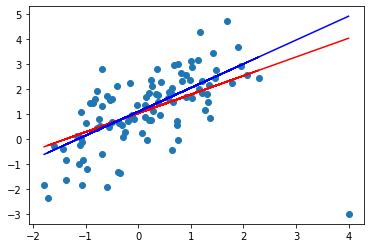

In [ ]:
plt.scatter(x, y)
m1 = LinearRegression() #definiujemy model liniowy 
m1.fit(X,y) #dopasowujemy go do danych
predictions_m1 = m1.predict(X) #liczymy wartości dopasowane na danych treningowych 
plt.plot(x,predictions_m1,'r') #rysujemy prostą MNK (optymalną w sensie kwadratowej funkcji straty)
#d
m2 = HuberRegressor() #definiujemy model liniowy z huberowską funkcją straty
m2.fit(X,y) #dopsaoujemy go do danych
predictions_m2 = m2.predict(X) #liczymy wartości dopasowane na danych treningowych
plt.plot(x,predictions_m2,'b') #rysujemy prostą (optymalną w sensie huberowskiej funkcji straty)
print(m1.coef_) #współczynnik dla kwadratowej funkcji straty - odbiega od prawdziwego b1
print(m2.coef_) #współczynnik dla huberowskiej funkcji straty - bliższy prawdziwemu b1

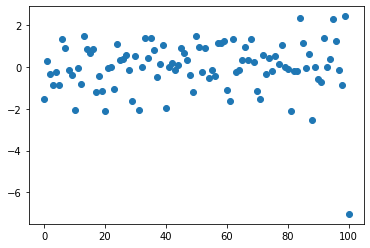

In [ ]:
plt.plot(np.arange(len(y)),y-predictions_m1,'o')

# 7.3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import QuantileRegressor
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving earthquake.csv to earthquake.csv


In [ ]:
df = pd.read_csv('earthquake.csv')

In [ ]:
df.head()

,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30
3,equake,5.36,4.49
4,equake,5.96,6.39


In [ ]:
df = df.values

In [ ]:
df[:,0]

array(['equake', 'equake', 'equake', 'equake', 'equake', 'equake',
       'equake', 'equake', 'equake', 'equake', 'equake', 'equake',
       'equake', 'equake', 'equake', 'equake', 'equake', 'equake',
       'equake', 'equake', 'explosn', 'explosn', 'explosn', 'explosn',
       'explosn', 'explosn', 'explosn', 'explosn', 'explosn'],
      dtype=object)

In [ ]:
df[:,0].astype("str")

array(['equake', 'equake', 'equake', 'equake', 'equake', 'equake',
       'equake', 'equake', 'equake', 'equake', 'equake', 'equake',
       'equake', 'equake', 'equake', 'equake', 'equake', 'equake',
       'equake', 'equake', 'explosn', 'explosn', 'explosn', 'explosn',
       'explosn', 'explosn', 'explosn', 'explosn', 'explosn'], dtype='<U7')

In [ ]:
df[:,0] = LabelEncoder().fit_transform(df[:,0].astype("str"))

In [ ]:
df[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=object)

In [ ]:
df[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=object)

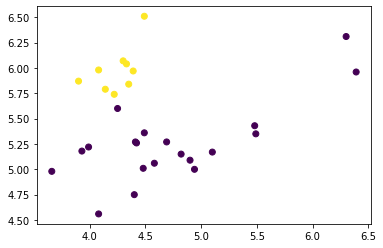

In [ ]:
plt.scatter(x = df[:,2], y = df[:,1], c = df[:,0])

zwracamy uwagę na to, że dane są liniowo separowalne

## b) metoda LinearSVC - maszyny wektorów nośnych o jądrze liniowym

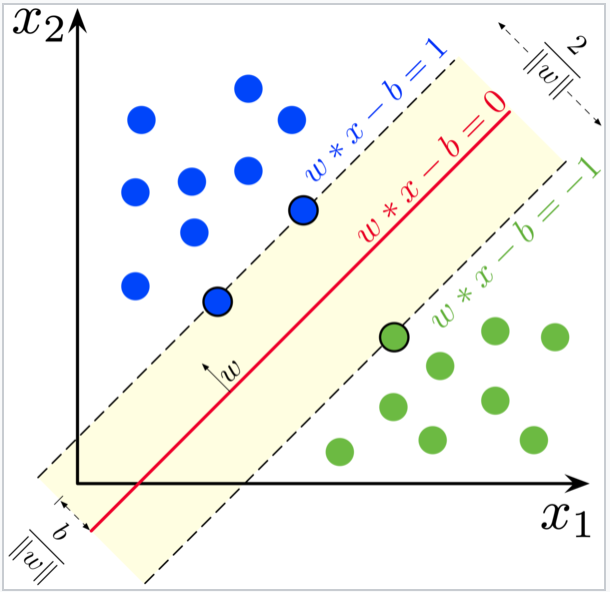

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[:,1:], df[:,0], test_size=0.3)

In [ ]:
X,y = df[:,1:],df[:,0]

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=object)

In [ ]:
y.type()

AttributeError: ignored

In [ ]:
model = LinearSVC(loss = 'hinge')
model.fit(X,y)

ValueError: ignored

In [ ]:
url = "earthquake.csv"
dataframe = pd.read_csv(url,header = 0)
data = dataframe.values
X,y = data[:,1:],data[:,0]
y = LabelEncoder().fit_transform(y)

In [ ]:
m1 = LinearSVC(loss = 'hinge')
m1.fit(X,y)

LinearSVC(loss='hinge')

## c) Marginesy i prosta separująca dane

In [ ]:
m1.coef_

array([[ 1.40837615, -1.67867421]])

In [ ]:
m1.intercept_

array([-0.57320446])

0 = m1.coef_[0][0]* x_1 + m1.coef_[0][1]*x_2 + intercept

1 = m1.coef_[0][0]* x_1 + m1.coef_[0][1]*x_2 + intercept

-1 = m1.coef_[0][0]* x_1 + m1.coef_[0][1]*x_2 + intercept

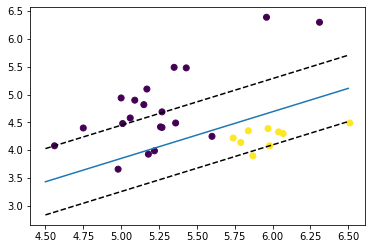

In [ ]:
plt.scatter(X[:,0],X[:,1],c = y)
x_plot = np.array([4.5,6.5])
plt.plot(x_plot, -(m1.coef_[0][0]*x_plot + m1.intercept_)/m1.coef_[0][1])
plt.plot(x_plot, -(m1.coef_[0][0]*x_plot + m1.intercept_ + 1)/m1.coef_[0][1], 'black', linestyle = '--') # lewy margines
plt.plot(x_plot, -(m1.coef_[0][0]*x_plot + m1.intercept_ - 1)/m1.coef_[0][1], 'black', linestyle = '--')

In [ ]:
m1.predict([[5,4.7]])

array([0])

In [ ]:
[[5,4.7]]

[[5, 4.7]]